In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# dados originais
data = pd.read_csv('players_stats_new.csv')
data

,Name,Games Played,MIN,PTS,FGA,FGM,FG%,3PM,3PA,3P%,...,Birth_Place,Birthdate,Collage,Experience,Pos,Team,Age,Height,Weight,BMI
0,AJ Price,26,324,133,137,51,37.2,15,57,26.3,...,us,7-Oct-86,University of Connecticut,5,PG,PHO,29,185.0,81.45,23.798393
1,Aaron Brooks,82,1885,954,817,344,42.1,121,313,38.7,...,us,14-Jan-85,University of Oregon,6,PG,CHI,30,180.0,72.45,22.361111
2,Aaron Gordon,47,797,243,208,93,44.7,13,48,27.1,...,us,16-Sep-95,University of Arizona,R,PF,ORL,20,202.5,99.00,24.142661
3,Adreian Payne,32,740,213,220,91,41.4,1,9,11.1,...,us,19-Feb-91,Michigan State University,R,PF,ATL,24,205.0,106.65,25.377751
4,Al Horford,76,2318,1156,965,519,53.8,11,36,30.6,...,do,3-Jun-86,University of Florida,7,C,ATL,29,205.0,110.25,26.234384
5,Al Jefferson,65,1992,1082,1010,486,48.1,2,5,40.0,...,us,4-Jan-85,NaN,10,C,CHA,30,205.0,130.05,30.945866
6,Alan Anderson,74,1744,545,440,195,44.3,73,210,34.8,...,us,16-Oct-82,Michigan State University,5,SG,NJN,33,195.0,99.00,26.035503
7,Alec Burks,27,899,374,300,121,40.3,26,68,38.2,...,us,20-Jul-91,University of Colorado,3,SG,UTA,24,195.0,96.30,25.325444
8,Alex Kirk,5,14,4,4,1,25.0,0,0,0.0,...,us,14-Nov-91,University of New Mexico,R,C,CLE,24,210.0,110.25,25.000000
9,Alex Len,69,1518,432,353,179,50.7,1,3,33.3,...,ua,16-Jun-93,University of Maryland,1,C,PHO,22,212.5,117.00,25.910035


In [3]:
# um pouco mais de informações sobre os dados
data.describe()

,Games Played,MIN,PTS,FGA,FGM,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,53.757180,1234.989556,511.950392,425.780679,191.584856,43.175457,41.083551,116.532637,25.778329,87.697128,...,24.804178,69.404700,103.420366,577.130548,1.490914,0.628381,27.467363,197.734987,99.816580,25.440336
std,23.707114,810.548586,426.225256,336.623905,157.269194,9.214672,49.217046,129.320185,15.497883,92.391876,...,32.670588,56.998215,64.674645,467.205123,0.824384,0.371926,4.179025,8.692892,12.402264,1.730134
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,20.000000,172.500000,72.450000,20.411523
25%,36.000000,507.000000,155.500000,148.000000,61.000000,39.900000,1.000000,6.000000,16.300000,20.500000,...,5.000000,24.000000,52.000000,175.500000,0.920000,0.390000,24.000000,191.250000,90.000000,24.273035
50%,62.000000,1233.000000,432.000000,361.000000,160.000000,43.300000,19.000000,60.000000,31.400000,58.000000,...,14.000000,59.000000,106.000000,506.000000,1.440000,0.540000,27.000000,200.000000,99.000000,25.411765
75%,74.000000,1910.500000,779.000000,652.500000,292.500000,47.650000,67.500000,192.000000,36.400000,130.000000,...,30.000000,100.500000,148.000000,839.500000,1.960000,0.820000,30.000000,205.000000,108.675000,26.530612
max,82.000000,2981.000000,2217.000000,1470.000000,659.000000,85.700000,286.000000,646.000000,66.700000,715.000000,...,200.000000,321.000000,285.000000,2202.000000,6.500000,3.000000,39.000000,222.500000,162.000000,32.723141


In [4]:
# coeficiente de relação (quanto mais próximo de 1.0 ou -1.0, melhor atributo)
data.corr()

,Games Played,MIN,PTS,FGA,FGM,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
Games Played,1.000000,0.868801,0.715884,0.732333,0.727393,0.390008,0.492188,0.511725,0.206241,0.564018,...,0.444156,0.698051,0.855979,0.746531,0.180447,0.003800,0.124174,0.025651,0.040425,0.046466
MIN,0.868801,1.000000,0.917161,0.925566,0.920816,0.321441,0.608622,0.624080,0.281137,0.772047,...,0.499550,0.862274,0.866298,0.922264,0.202546,-0.056566,0.072414,-0.021220,0.000758,0.030585
PTS,0.715884,0.917161,1.000000,0.988967,0.989577,0.289329,0.630076,0.637590,0.302480,0.908683,...,0.446003,0.875246,0.740206,0.942713,0.160444,-0.106106,0.054055,-0.040485,0.005257,0.059068
FGA,0.732333,0.925566,0.988967,1.000000,0.987260,0.249937,0.632655,0.650849,0.316259,0.864300,...,0.410698,0.876600,0.747587,0.919441,0.188956,-0.104780,0.056191,-0.066415,-0.018828,0.048493
FGM,0.727393,0.920816,0.989577,0.987260,1.000000,0.326304,0.558118,0.565509,0.262973,0.863444,...,0.491525,0.862230,0.764479,0.953247,0.140756,-0.116575,0.053422,0.006137,0.054984,0.088174
FG%,0.390008,0.321441,0.289329,0.249937,0.326304,1.000000,-0.031659,-0.059201,-0.079547,0.240740,...,0.425336,0.247373,0.397976,0.396972,-0.111132,-0.076306,0.060379,0.338898,0.365319,0.220869
3PM,0.492188,0.608622,0.630076,0.632655,0.558118,-0.031659,1.000000,0.988107,0.556547,0.473934,...,-0.067063,0.519542,0.388288,0.464736,0.291440,0.054438,0.100790,-0.324519,-0.323237,-0.163054
3PA,0.511725,0.624080,0.637590,0.650849,0.565509,-0.059201,0.988107,1.000000,0.552525,0.489771,...,-0.075948,0.545271,0.405077,0.464624,0.310491,0.059449,0.087843,-0.349649,-0.348008,-0.175425
3P%,0.206241,0.281137,0.302480,0.316259,0.262973,-0.079547,0.556547,0.552525,1.000000,0.203675,...,-0.216722,0.222589,0.088544,0.167020,0.359099,0.099977,0.026425,-0.371982,-0.443734,-0.321837
FTM,0.564018,0.772047,0.908683,0.864300,0.863444,0.240740,0.473934,0.489771,0.203675,1.000000,...,0.419897,0.825583,0.605315,0.856162,0.105729,-0.121623,0.013805,-0.034787,0.009253,0.059175


In [5]:
# Campos relavantes para o treinamento
cols = ['Games Played']
# Campo para predição
cols_target = ['MIN']

regression = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(
    data[cols], data[cols_target], test_size=0.2, random_state=4)

In [6]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

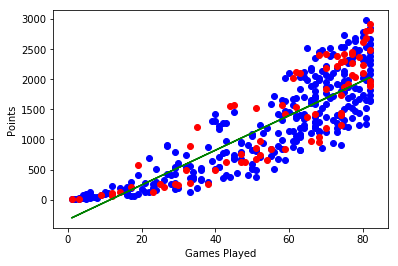

In [7]:
plt.scatter(x_train['Games Played'], y_train, color='blue')
plt.scatter(x_test['Games Played'], y_test, color='red')
plt.plot(x_train['Games Played'], model.predict(x_train), color='green')
plt.xlabel('Games Played')
plt.ylabel('Points')
plt.show()

In [8]:
# Executa Treinamento com 80% dos dados disponíveis
regression.fit(x_train, y_train)

# Faz previsão dos 20% dos dados que não entraram no treinamento
output = regression.predict(x_test)
output


array([[1772.14269967],
       [1166.49242303],
       [ 416.63969956],
       [1685.62123158],
       [1051.13046557],
       [1368.37584857],
       [1627.94025285],
       [ 618.52312511],
       [ 330.11823147],
       [  12.87284847],
       [-246.69155581],
       [1916.34514649],
       [1974.02612522],
       [ 820.40655066],
       [1224.17340175],
       [1685.62123158],
       [ 532.00165702],
       [2002.86661458],
       [  70.5538272 ],
       [1887.50465712],
       [1426.0568273 ],
       [1022.28997621],
       [1974.02612522],
       [1627.94025285],
       [ 964.60899748],
       [1772.14269967],
       [2031.70710394],
       [1887.50465712],
       [1800.98318903],
       [1454.89731667],
       [1829.8236784 ],
       [ 676.20410384],
       [ 214.75627402],
       [1685.62123158],
       [ 503.16116766],
       [1253.01389112],
       [ 589.68263575],
       [1599.09976349],
       [1800.98318903],
       [1829.8236784 ],
       [1368.37584857],
       [1829.823

In [9]:
# Verifica a qualidade da previsão
score = r2_score(y_test, output)
score

0.7436069260039342

In [10]:
# Usa o treinamento para fazer uma previsão de um dado novo
df_new_attempted_info = pd.DataFrame(
    [(67)], columns=['Games Played'])

output2 = regression.predict(df_new_attempted_info)
output2

array([[1599.09976349]])